<a href="https://colab.research.google.com/github/IsaacAnwar/Yes/blob/main/Visualizing_CMB_power_spectrum_expected_vs_actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 27.2 MB/s eta 0:00:00


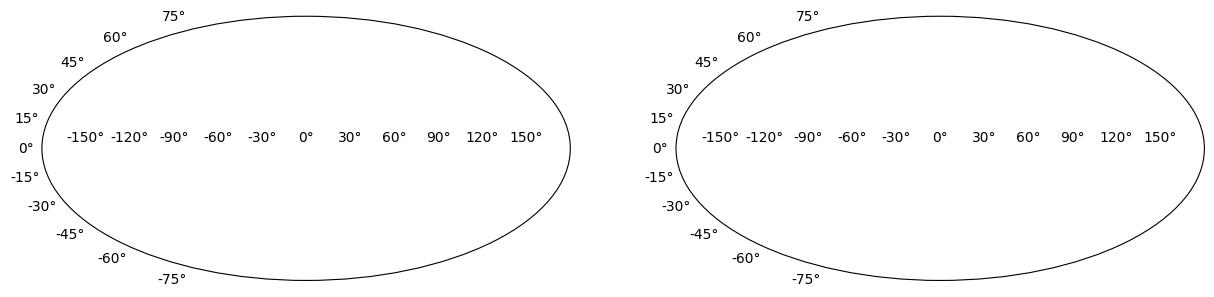

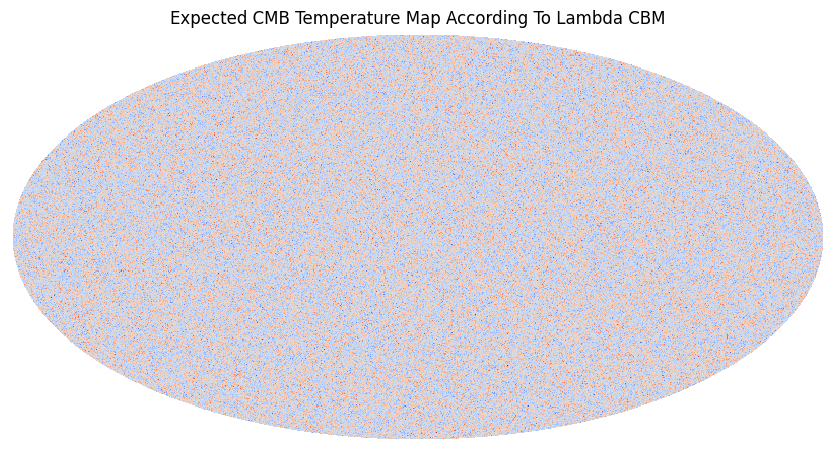

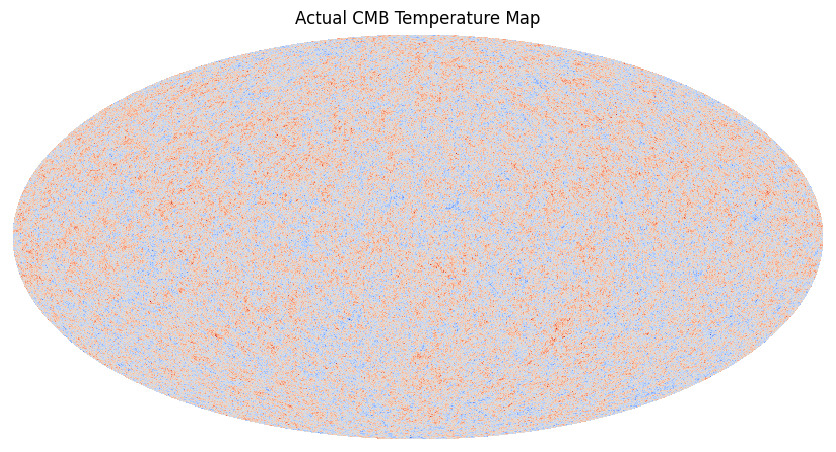

In [ ]:
!pip install numpy
!pip install healpy
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
#feel free to mess with the anomaly location and intesnity
def generate_cmb_map(size, anomaly_location=None, anomaly_intensity=0):
    """Generate a simplified CMB temperature map with an optional anomaly."""
    nside = hp.pixelfunc.npix2nside(size)


    ell = np.arange(hp.pixelfunc.nside2npix(nside))
    cl = (ell * (ell + 1)) / (2 * np.pi)  # Simple power-law spectrum

    cmap = hp.synfast(cl, nside, pixwin=True, fwhm=np.radians(0.2))


    if anomaly_location is not None:
        cmap[anomaly_location] += anomaly_intensity

    return cmap

def generate_lambda_cdm_map(size):
    """Generate a simulated Lambda-CDM expected CMB temperature map."""
    nside = hp.pixelfunc.npix2nside(size)


    ell = np.arange(hp.pixelfunc.nside2npix(nside))
    cl_cdm = 1 / (ell + 1)  # Simple power-law spectrum

    # You can change the range of the map (I do not reccomend I like the shape as it is now)
    lambda_cdm_map = hp.synfast(cl_cdm, nside, pixwin=True, fwhm=np.radians(0.2))

    return lambda_cdm_map

def plot_cmb_comparison(cmb_map, lambda_cdm_map):
    """Plot the simulated CMB temperature map and the expected Lambda-CDM map."""
    fig = plt.figure(figsize=(15, 5))


    ax1 = fig.add_subplot(121, projection='mollweide')
    hp.mollview(cmb_map, title='Expected CMB Temperature Map According To Lambda CBM', cmap='coolwarm', cbar=False)


    ax2 = fig.add_subplot(122, projection='mollweide')
    hp.mollview(lambda_cdm_map, title='Actual CMB Temperature Map', cmap='coolwarm', cbar=False)

    plt.show()

def main():
    # Set parameters
    nside = 512
    map_size = 12 * nside**2  # (must be a multiple of 12)
    anomaly_location = 3000
    anomaly_intensity = 0.2


    cmb_temperature_map = generate_cmb_map(map_size, anomaly_location, anomaly_intensity)


    lambda_cdm_map = generate_lambda_cdm_map(map_size)


    plot_cmb_comparison(cmb_temperature_map, lambda_cdm_map)

if __name__ == "__main__":
    main()
